In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [204]:
train = pd.read_csv('../dataset/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../dataset/house-prices-advanced-regression-techniques/test.csv')

In [205]:
train.head()
train = train.drop('Id', axis = 1)

In [206]:
price = train.SalePrice
train = train.drop('SalePrice', axis = 1)

In [207]:

numerical = train.select_dtypes(include='number')
categorical = train.select_dtypes(include='object')

In [208]:
#categorical = categorical.drop('Alley', axis = 1)

In [209]:
print(numerical.shape)
print(categorical.shape)

(1460, 36)
(1460, 43)


In [210]:
numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [211]:
categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### handling categorical data using dummy values

In [212]:
cat_dummies = pd.get_dummies(categorical)

In [213]:
cat_dummies.shape

(1460, 252)

In [214]:
data = pd.concat([numerical, cat_dummies], axis = 1)

In [215]:
data.shape

(1460, 288)

In [216]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [217]:
from sklearn.preprocessing import Imputer

In [218]:
# Impute missing
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(data)
data = imp.transform(data)


In [219]:
dataframe = pd.DataFrame(data)
dataframe.isnull().values.sum()

0

In [220]:
data.shape

(1460, 288)

### test and train seperation

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
xd_train, xd_test, yd_train, yd_test = train_test_split(data, price, test_size = 0.2)

### train ya model 

In [250]:
from sklearn.linear_model import Ridge

In [251]:
model = Ridge(max_iter=2000)
model.fit(xd_train, yd_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=2000,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [252]:
model.score(xd_train, yd_train)

0.9225517792654807

In [253]:
model.score(xd_test, yd_test)

0.8652743304800032

In [254]:
pred = model.predict(xd_test)

In [255]:
import sklearn.metrics as metrics

In [256]:
print(metrics.r2_score(yd_test, pred))

0.8652743304800032


In [257]:
import xgboost as xgb
params = {'eval_metric':'rmse'}
xm = xgb.DMatrix(xd_train, label=yd_train)
xmodel = xgb.train(params, xm)
xgpred = xmodel.predict(xgb.DMatrix(xd_test))

/home/macab/.local/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [258]:
print(metrics.r2_score(xgpred, yd_test))

0.6280096104233772


In [259]:
from sklearn.linear_model import Lasso

In [260]:
lasso = Lasso(max_iter=5000)
lasso.fit(xd_train, yd_train)

/home/macab/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3034667808.3358154, tolerance: 740083486.8926411
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=5000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [261]:
lasso.score(xd_train, yd_train)

0.9356170451520456

In [262]:
lasso.score(xd_test, yd_test)

0.8710678092504001

In [263]:
lasso_pred = lasso.predict(xd_test)

In [264]:
print(metrics.r2_score(lasso_pred, yd_test))

0.8664565281918492


In [265]:
lasso_pred

array([ 21121.30104668, 339921.78798922, 132798.34628042,  80224.4659693 ,
       191557.52427863, 238793.73096544, 165428.65910014, 352513.26344181,
       142862.07147572, 259399.56538513, 210045.26863047, 195300.61793086,
       113418.15708919, 202038.35345803, 208922.4253652 , 179947.30715489,
       159354.70992586, 207763.10052408, 409087.2093442 , 190365.16279934,
       211299.91634309,  86244.26450311, 221333.07324864, 106499.31349848,
        83267.76321658, 114965.77959995,  86632.8784836 ,  90766.65982144,
       407900.66842407, 169482.25225511, 136742.11223629, 234205.56159585,
       157727.85714867, 187540.21071903, 261455.84882736,  61508.43563139,
        99209.5391989 , 187403.84935978, 246041.29830091, 136214.76261361,
       128849.8515843 , 153019.07730126, 293035.59827632, 170817.91399857,
       171559.78803745, 381740.23572981, 145117.09361702, 118281.95502388,
       114313.51523187, 358884.08124894, 164707.08773029, 266911.40416295,
       117459.14643459, 1

In [266]:
metrics.r2_score(pred, lasso_pred)

0.9794598226490209

### Let's do the real shit

In [270]:
categorical.isnull().values.sum()

5248

In [274]:
alley = pd.get_dummies(categorical['Alley'])
categorical = categorical.drop(categorical.Alley)

In [275]:
numerical = pd.concat([numerical,  alley], axis = 1)

In [276]:
numerical.shape

(1460, 38)

In [280]:
def transform(categorical):
    for each in categorical.columns:
        print(each)
        print(np.unique(categorical[each], return_counts=True))

In [281]:
transform(categorical)

MSZoning
(array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object), array([  10,   65,   16, 1149,  218]))
Street
(array(['Grvl', 'Pave'], dtype=object), array([   6, 1452]))
Alley
(array([0, 1], dtype=uint8), array([1408,   50]))
LotShape
(array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object), array([484,  41,  10, 923]))
LandContour
(array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object), array([  63,   50,   36, 1309]))
Utilities
(array(['AllPub', 'NoSeWa'], dtype=object), array([1457,    1]))
LotConfig
(array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object), array([ 263,   94,   46,    4, 1051]))
LandSlope
(array(['Gtl', 'Mod', 'Sev'], dtype=object), array([1380,   65,   13]))
Neighborhood
(array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Ve

TypeError: '<' not supported between instances of 'float' and 'str'

In [282]:
print(categorical.MasVnrType)

2       BrkFace
3          None
4       BrkFace
5          None
6         Stone
7         Stone
8          None
9          None
10         None
11        Stone
12         None
13        Stone
14      BrkFace
15         None
16      BrkFace
17         None
18         None
19         None
20      BrkFace
21         None
22      BrkFace
23         None
24         None
25        Stone
26         None
27        Stone
28         None
29         None
30         None
31         None
         ...   
1430       None
1431       None
1432       None
1433    BrkFace
1434       None
1435    BrkFace
1436       None
1437      Stone
1438       None
1439    BrkFace
1440       None
1441    BrkFace
1442      Stone
1443       None
1444    BrkFace
1445       None
1446    BrkFace
1447    BrkFace
1448       None
1449       None
1450       None
1451      Stone
1452    BrkFace
1453       None
1454       None
1455       None
1456      Stone
1457       None
1458       None
1459       None
Name: MasVnrType, Length

TypeError: nan is not a string

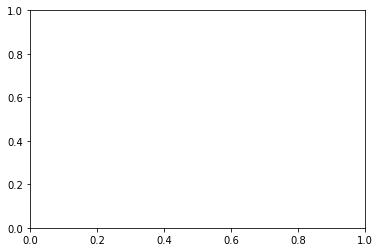

In [283]:
plt.scatter(price, categorical.MasVnrType)